In [2]:
# INTRODUCTION TO PREDICTIVE MODELING

# Examples where predictive modeling can be useful
# Movie recommendations based on gender, age, sex, past movies etc
# Predicting the stock price etc
# Predictive modeling is using past data to predict future data

# Identifying factors responsible for Sales reduction - This is detective analysis rather than predictive modeling since
# no future forecast is involved

# TYPES OF PREDICTIVE MODELS
# Supervised Learning - A definite target variable is available from the historical data which can be used to predict
# future data Ex: House price prediction. The house price may be dependent on the locality, number of rooms, area etc

# Un-Supervised Learning - No specific target variables are available. Data are segmented based on the commonalities
# and the differences between each other. Ex: Google News grouping, segmentation of the customers etc

# Types of Supervised Learning - Target Variables are Continuous values (Regression) vs Discrete Values (Classification)
# UnSupervised Learning - Classic example is market segmentation.. Like segmenting customer base in to
# High Salary - High Spend, High Salary - Low Spend, Low Salary - High Spend, Low Salary - Low Spend

# STAGES OF PREDICTIVE MODELING

# Process of Predictive Modeling can be divided in to six stages
# 1 - Problem Definition
# 2 - Hypothesis Generation
# 3 - Data Extraction from all possible sources
# 4 - Data Exploration and Transformation
# 5 - Predictive Modeling
# 6 - Model Deployment / Implementation

# Problem Identification: Identifying the right problem, and formulating the problem mathematically
# Bad Problem Statement: Want to improve the profitability of credit card customers
# Reason: The above goal can be achieved in many different ways. Like, increasing the APR of the credit cards, or
# having different APR and benefits for different customer segments, or identifying customers with low default rate
# A problem statement should have a straight forward specific goal
# Good Problem Statement: Want to predict the default rate of customer (All the above defined possibilities rely
# on the customer default rate. Hence, predicting the default rate is more straight forward goal / prob. statement

# Hypothesis Generation: Listing down all possible variables, that might influence problem objective

# Let us analyze all the possible factors that might affect the above problem statement:
# Income: Higher Income people might have lower default rate
# Job Type: Person with a stable job might have a lower default rate
# Credit History: Previous repayment behavior can have an impact on future payment behavior
# Education: Educated people have better understanding of credit products, and may have lower default rate

# Hypothesis Generation should be done before looking at the data to avoid any bias

# Data Extraction:
# Collect data from as many sources as possible
# Also when we look at the data, we may come across any additional hypothesis as well
# The various data source may come from demographics of the customer, transaction history of the customer,
# payment history credit score from the bureau, and external competitive pricing information

# Data Exploration:
# Reading the data - pulling data from the data source to the work environment
# Variable Identification - We should identify the predictor and the target variable, and its data type
# Uni-variate Analysis - Analyze variables one by one by exploring bar plots, and histograms
# Bi-variate Analysis - Exploring the relation between two variables
# Missing Value Treatment - Identify variables with missing values, and imputing with mean, median, or mode etc.
# Outlier Treatment - Come up with methods to fix outliers
# Variable Transformation - Modify data to suit algorithm we wish to apply on data (log transformation on skewed data)

#proj_dir = "C:/Users/sivac/Documents/Python Projects/Introduction to Data Science Course/"
#path = proj_dir + "Data Files/Predictive Modeling and Machine Learning/data.csv"
path = '/Users/s/dev4/daily-code-snippet/exam_practice/practice/Titanic.csv'
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('expand_frame_repr', False)

df = pd.read_csv(path)



In [3]:
df.shape


(891, 12)

In [4]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:

# Variable Identification:
# Process of identifying variables that are independent and dependent
# Identify the data type i.e. continuous vs categorical

# Dependent Variable: Variable that we are trying to predict (Ex: Survived in the above data set)
# Independent Variable: Variables that help in predicting dependent variable (Ex: sex, fare etc.)
# The dependent and independent variable can only be identified from the problem statement

# Category variables are stored as objects, whereas continuous variables are stored as int or float
# The variables can be identified using "dtypes" in pandas

df['PassengerId'].dtypes


dtype('int64')

In [7]:

df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:

# Uni-variate analysis for continuous variables:
# What - Explore one variable at a time, and summarize the variable to discover insights, and anomalies etc.
#  Why - To identify the following
#           Central Tendency and Distribution - mean, median, standard deviation
#           Distribution of the variable - Symmetric, right skewed, or left skewed
#           Presence of missing values
#           Presence of Outliers

# Uni-variate analysis for Continuous Variable:
# Tabular Method: For analyzing mean, median, Standard Deviation, and missing values
# Graphical Method: Distribution of variables, and detecting outliers

# the "describe" function returns statistical summary for all continuous variables
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


AttributeError: 'SubplotSpec' object has no attribute 'rowspan'

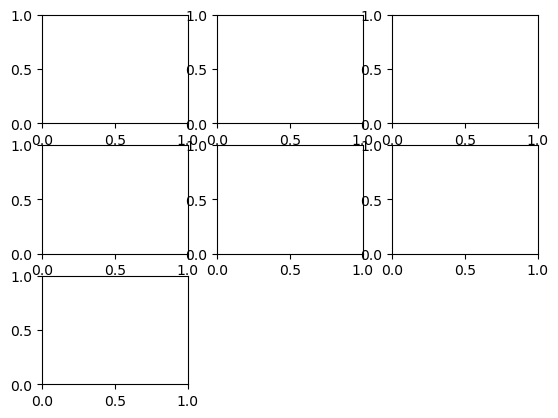

In [9]:

# Graphical Method:
# One way of analyzing continuous data is using histogram

pd.DataFrame.hist(df)   # display histogram for all continuous variables in a pandas data frame

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

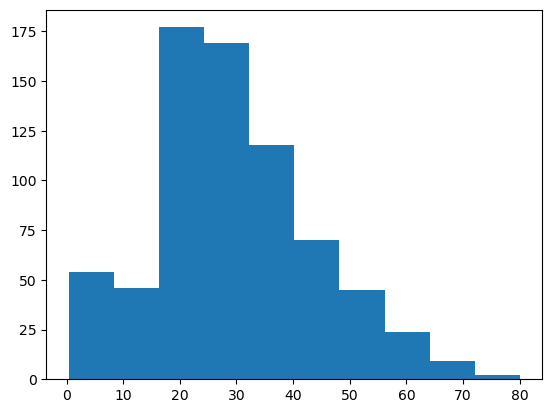

In [ ]:


import matplotlib.pyplot as plt
plt.hist(df['Age'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7ee12c7e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7ee131c280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7ee12c7f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ee131c700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ee131c7f0>],
 'means': []}

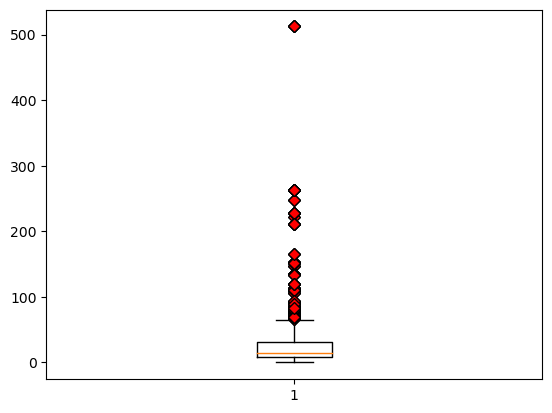

In [ ]:

# Another way of analyzing the continuous data is using Box Plots

#pd.DataFrame.boxplot(df)
plt.boxplot(df['Fare'], flierprops=dict(markerfacecolor='r', marker='D'))


In [10]:

# Uni-variate analysis for categorical variables:
# Some of the analysis that can be performed or everyone is interested in uni-variate analysis is:
# Count - absolute frequency of each category in a categorical variable
# Count% - proportion of different categories in a categorical variable expressed as %
 
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('expand_frame_repr', False)

In [11]:


# Similar to continuous variables, we can perform either tabular methods or graphical methods
df['Gender'].value_counts()  # Frequency of the categorical variable


Gender
male      577
female    314
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts() / df.shape[0]  # Frequency % of the categorical variable


Gender
male      0.647587
female    0.352413
Name: count, dtype: float64

In [13]:
df['Gender'].value_counts() / len(df['Gender'])  # Frequency % of the categorical variable


Gender
male      0.647587
female    0.352413
Name: count, dtype: float64

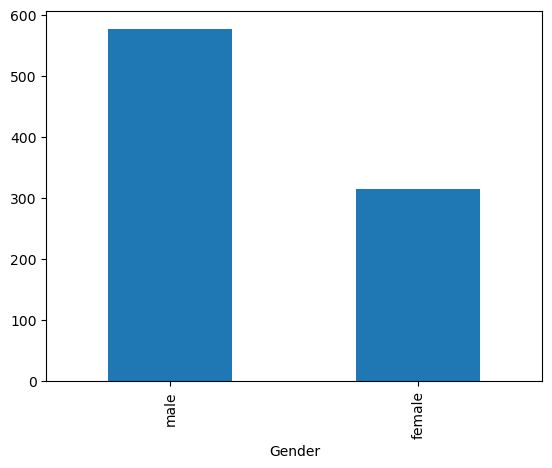

In [14]:

df['Gender'].value_counts().plot.bar()  # Bar plot for frequency


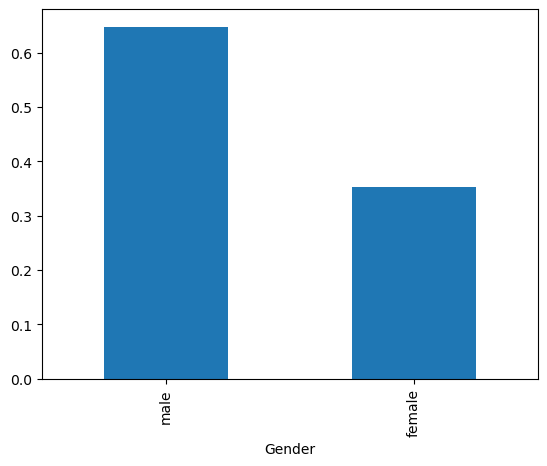

In [15]:
(df['Gender'].value_counts() / df.shape[0]).plot.bar()  # Bar plot for frequency %


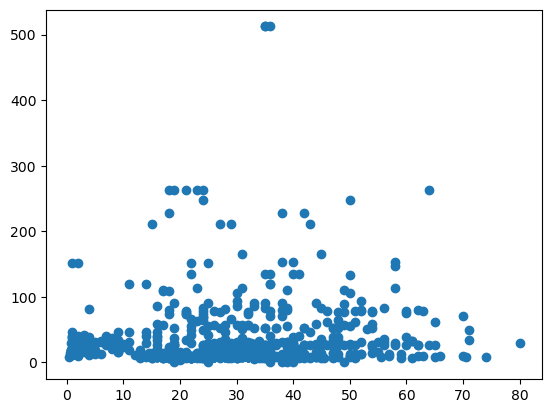

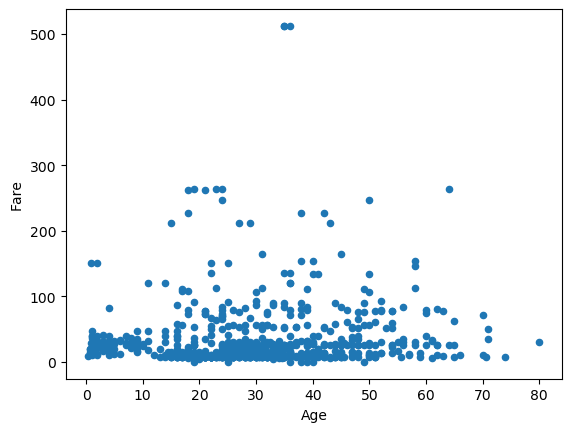

In [16]:

 
# Bi-variate analysis
# When two variables are studied together to understand their relationship (or if any relationship exists)
# Bi-variate analysis helps in prediction

# Types of bi-variate analysis:
# Continuous - Continuous variables
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Fare'])
df.plot.scatter('Age', 'Fare')


In [24]:
df['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [25]:
# Analyzing the figure there is not much information from the two variables

df['Age'].corr(df['Fare'])
#df.corr()

0.0960666917690389

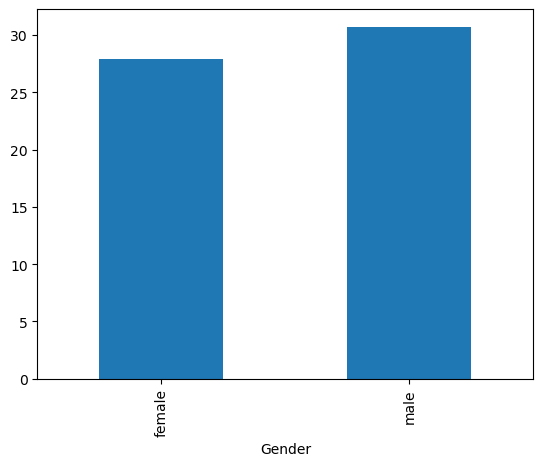

In [27]:
# As figured from the scatter plot, there exists a very weak correlation between Age and Fare

# Categorical - Continuous Analysis
# Does the mean age of male different from that of female?

df.groupby('Gender')['Age'].mean()
df.groupby('Gender')['Age'].mean().plot.bar()

In [30]:

import scipy.stats as stats

(df['Age'][df['Gender'] == "male"]).std(ddof=1)

14.678200823816601

In [29]:
(df['Age'][df['Gender'] == "female"]).std(ddof=1)

14.110146457544134

In [32]:
stats.ttest_ind(df['Age'][df['Gender'] == "male"], df['Age'][df['Gender'] == "female"],  nan_policy='omit')
# The 2 sample t test suggest that there is a significant difference between the mean age of males from females

TtestResult(statistic=2.499206354920835, pvalue=0.012671296797013709, df=712.0)

In [33]:
df['Age'][df['Gender'] == "male"]

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: Age, Length: 577, dtype: float64

In [36]:
# Categorical - Categorical Analysis
# Does the gender have any relation on survival rates?
pd.crosstab(df['Gender'], df['Survived'])


Survived,0,1
Gender,,
female,81,233
male,468,109


In [37]:
stats.chi2_contingency(pd.crosstab(df['Gender'], df['Survived']))

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

In [39]:
stats, p_value, dof, expected_freq = stats.chi2_contingency(pd.crosstab(df['Gender'], df['Survived']))
print(stats)

260.71702016732104


In [ ]:
# From the pvalue, it is evident that there is a significant difference between sex and survival rates
# Note that when we have an exclusive list of observed, then we can use the chisquare instead of the contigency function

# MISSING VALUES TREATMENT

# Types of Missing Values
#       Missing completely at random (MCAR) - missing values have no relation to the value iteself neither other values
#               For instance, in a dataset with two columns Age and IQ, the missing values in IQ column have
#               no relation with both Age or IQ

#       Missing at Random (MAR) - missing values have some related with other variables present in the data
#               For instance, if we have two columns Age, and IQ, then the IQ values are missing for any age < 55,
#               then this type of missing values are called MAR

#       Missing not at random (MNAR) - missing value have some sort of relation with the column itself
#               For example, in a data set with two columns Age, and IQ, if all values of IQ less than 100 are
#               missing, then they are called MNAR

# Identifying missing values
# describe - this is helpful for finding missing values only for continuous variable
# Isull - can be used for both continuous and categorical variable


# Treating Missing Values
# Imputation
#       Continuous - mean, median, mode,  and regression methods
#       Categorical - mode, classification model

# Deletion
#       Row wise deletion - Delete the entire row
#       Column wise deletion - Delete entire column

# Deletion treatment results in loss of data. So, imputation is preferred over deletion, unless required

proj_dir = "C:/Users/sivac/Documents/Python Projects/Introduction to Data Science Course/"
path = proj_dir + "Data Files/Predictive Modeling and Machine Learning/data.csv"

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('expand_frame_repr', False)

df = pd.read_csv(path)

# Identify missing values of numerical variables
df.shape
df.describe()
len(df[df['Age'].isnull()])

# To identify all missing values in the data set
df.isnull().sum()
# From the above function, it is evident that we have missing values in age, cabin, and Embarked

# Drop any rows with missing values
df.dropna()
df.dropna().shape
df.dropna().isnull().sum()

# Drop only those rows where all values are missing
df.dropna(how='all').shape
# There are no rows where all values are missing

# Dropping any columns that have missing values
df.dropna(axis=1).shape   # 3 columns that had missing values were deleted

# Dropping columns that have all missing values
df.dropna(axis=1, how='all').shape   # There are no columns with all missing values

# Filling all na with zero
df.fillna(0)

# If the above action of filling na is to be done within the dataset, we use the argument inplace=T
# df.fillna(0, inplace=True)

# To impute a numerical variable with value other than zero
df['Age'].fillna(df['Age'].mean())

# OUTLIER TREATMENT
# Uni-variate Outliers: Analyze one variable for outliers - can be identified using box plot
# Bi-variate Outliers: Analyze two variables for outliers  - can be identified using scatter plot

# Identifying Outliers:
# Value less than Q1 - 1.5 IQR or greater than Q3 + 1.5 IQR
# IQR is the Inter Quartile Range which is Q3 - Q1

# Treating Outliers:
# Deleting Outliers
# Transforming and Binning Values
# Imputing Outliers similar to missing values
# Treat the outliers separately

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('expand_frame_repr', 100)


proj_dir = "C:/Users/sivac/Documents/Python Projects/Introduction to Data Science Course/"
path = proj_dir + "Data Files/Predictive Modeling and Machine Learning/data.csv"
df = pd.read_csv(path)

pd.DataFrame.boxplot(df)
df['Age'].plot.box()
df['Fare'].plot.box()

df.plot.scatter('Age', 'Fare')
pd.scatter_matrix(df)

# Removing Outliers from the data set
# From the above scatter plot for Age and Fare, there are two data points that appear as outlier. One way to remove
# the outlier is to filter the data where the fare is greater than 300
df1 = df[df['Fare'] < 300]
df1.plot.scatter('Age', 'Fare')

# Replacing outliers in Age variable with the mean
df1.loc[df['Age'] > 65, 'Age'] = df1['Age'].mean()  # Outliers imputed with mean. They can also be done with median
# df1.loc[df['Age'] > 65, 'Age'] = df1['Age'].median()
# np.mean(df['Age']) also gives the mean.. np is from numpy package

df1['Age'].plot.box()

# Variable Transformation:

# Replace a variable with some function of that particular variable (i.e. replacing with log)
# Is a process in which we change the distribution or relationship of a variable with others

# Why used
# To change the scale of the variable. For instance, when we have 20 variables of which 17 are in Km, and 3 are in mile
# then the change in scale will create some issues. To bring the scale the same across the column, variable
# transformation are performed

# Transforming non linear relationships to linear relationships as linear relationships are easier to predict

# Create a symmetric distribution from a skewed distribution, as symmetric or normally distributed data
# are required for many model predictions etc

# Common methods of variable transformation

# Taking log of the variables reduces the right skewness of the variable
# Square Root - Used for right skewed variable, but applicable only for positive values
# Cube Root - Used for right skewed variable for both positive and negative variables
# Binning - convert continuous variable to categorical variable

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('expand_frame_repr', 100)
import numpy as np
import matplotlib.pyplot as plt

proj_dir = "C:/Users/sivac/Documents/Python Projects/Introduction to Data Science Course/"
path = proj_dir + "Data Files/Predictive Modeling and Machine Learning/data.csv"
df = pd.read_csv(path)

df['Age'].plot.hist()

# Let us analyze the results of different transformations:

plt.subplot(221)
df['Age'].plot.hist()
plt.title = 'Age Histogram'
plt.subplot(222)
np.log(df['Age']).plot.hist()  # Taking log is completely changing the skewness to the left. Not very good
plt.title = 'Log transformation of Age Histogram'
plt.subplot(223)
np.sqrt(df['Age']).plot.hist()
plt.title = 'SQRT transformation of Age Histogram'
plt.subplot(224)
np.power(df['Age'], 1/3).plot.hist()
plt.title = 'Cube Root transformation of Age Histogram'
plt.show()

# Of all the above transformation, the sqrt gives better symmetry

# Transformation by Binning:
df['Age'].plot.hist()

# Let us consider from the above data set that people with age 0-15 are children, and the rest are adults
bins = [0, 15, 80]
group = ['child', 'adult']
df['Age Group'] = pd.cut(df['Age'], bins, labels=group)
df.head
# df['Age Group'].isnull().value_counts()
df['Age Group'].value_counts().plot(kind='bar')
df.groupby('Age Group').size().plot(kind='bar')

# BASICS OF MODEL BUILDING

# Three steps involved in model building:
#           Algorithm Selection
#           Training Model
#           Prediction or Scoring

# Chart for Algorithm Selection
# IF Dependent Variable exists, then Supervised Learning, else Unsupervised Learning
#           If Supervised Learning, Is dependent Variable continuous?
#                   If yes, then regression problem (Simple Linear Regression, Multiple Regression)
#                   If not, then classification problem (Logistic Regression, Decision Tree, Random Forest)
#           If Unsupervised, then Clustering problem (k-means, spectral clustering)


# LINEAR REGRESSIONS:
# r square is a measure of how good the model is
# r square = Sum of Square of Regression / Sum of Square of Total Variance (i.e. Sum((y hat - actual mean)^2) / Sum((y - actual mean)^2)
# r square can also be calculated from 1 - {Sum((y hat - y)^2) / Sum((y - actual mean)^2)}
# r square always lies between 0 and 1
# RMSE is one of the most popular metric for scoring regression models

# IMPLEMENTING LINEAR REGRESSION IN PYTHON

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('expand_frame_repr', False)
import numpy as np
import matplotlib.pyplot as plt

proj_dir = "C:/Users/sivac/Documents/Python Projects/Introduction to Data Science Course/"
path = proj_dir + "Data Files/Predictive Modeling and Machine Learning/linear_regression_train.csv"
df = pd.read_csv(path)

df.dtypes
df.head()
df.shape


# In order for linear regression to run, all the variables should be numerical
# Categorical variables can be converted to numerical using the get_dummies function in pandas
# Creating dummies before split to avoid any conflicts between dummy variable creation

df_backup = df
df = pd.get_dummies(df,)


df_train = df[0:8000]
df_test = df[8000:]

x_train = df_train.drop('Item_Outlet_Sales', axis=1)
y_train = df_train['Item_Outlet_Sales']
x_test = df_test.drop('Item_Outlet_Sales', axis=1)
true_pred = df_test['Item_Outlet_Sales']

# Building a linear regression model
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()


# For linear regressions to run properly, there should not be any missing values. For this case, let us fill NA with 0
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)

lreg.fit(x_train, y_train)
pred = lreg.predict(x_test)

# Performance of the model:

lreg.score(x_test, true_pred)  # r square is 0.4029
lreg.score(x_train, y_train)  # r square is 0.6497
# From the above score test, r square has dropped significantly. The reason can be that the model  is
# over fitted for train data set, or the test data is not an actual representation of train

rmse_test = np.sqrt(np.mean(np.power((np.array(true_pred) - np.array(pred)), 2)))
rmse_train = np.sqrt(np.mean(np.power((np.array(y_train) - np.array(lreg.predict(x_train))), 2)))
# The RMSE results also very similar to r square. i.e. either there is over fitting or test is not representing train

pd.DataFrame.boxplot(df1)
pd.scatter_matrix(df1)

# UNDERSTANDING LOGISTIC REGRESSION:

# Logistic regression is basically a sigmoid function 1 / (1 + e^-yhat)
# Logistic regression is used for Yes / No classification. It determines whether a an outcome can occur or not, given the possibility of X
# Cost Function = -y (log(yhat)) - (1-y) log(1-yhat)

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)
import numpy as np
import matplotlib.pyplot as plt

proj_dir = "C:/Users/sivac/Documents/Python Projects/Introduction to Data Science Course/"
path = proj_dir + "Data Files/Predictive Modeling and Machine Learning/titanic.csv"
df = pd.read_csv(path)

df.head()
df['Survived'].value_counts()
df = pd.get_dummies(df)
df.fillna(0, inplace=True)
df.shape
train_data = df[0:699]
test_data = df[700:890]
x_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
x_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)

logreg.score(x_test, y_test)
logreg.score(x_train, y_train)

# The accuracy has dropped significantly from 92 to 82. The major reason might be we are using the name of the passengers.
# Let us try rerun the logistic regression by removing the passenger name

df['Survived'].value_counts()
df['Cabin_Fixed'] = df['Cabin'].astype(str).str[0]  # To generalize the Cabin rather than having all seat number
df['Cabin_Fixed'][df['Cabin'].isnull()] = df['Cabin']
df.Fare.plot.hist(bins=20)  # To see if having a fare group can have an impact on the overall model
bins = [0, 20, 250, 500]
group = ['low', 'med', 'high']
df['Fare_Group'] = pd.cut(df['Fare'], bins, labels=group)
df.head()
pd.crosstab(df['Cabin_Fixed'], df['Fare_Group'])


df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df = pd.get_dummies(df)
df.fillna(0, inplace=True)
df.shape
train_data = df[0:699]
test_data = df[700:890]
x_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
x_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)

logreg.score(x_test, y_test)  # 0.81
logreg.score(x_train, y_train)  # 0.79

accuracy_df = pd.DataFrame({'Actual_Values': y_test, 'Predicted_Values': predictions})
pd.crosstab(accuracy_df['Actual_Values'], accuracy_df['Predicted_Values'])

# Though the overall model did not improve, the test and train are more or less close which means that the model is now
# more generalized, rather than over fitting the training data

# Additional Reference: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
# https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65

# UNDERSTANDING DECISION TREES:

# Decision tree is nothing but slicing data by asking questions at each point. The question may start more generic to more focused
# as we go deeper in to the node

# The node at which the first decision split occurs is called the Root Node, and the last node is called the terminal nodes (or leaf node).
# The number of decision branches required to arrive at the terminal node is called the depth of the tree

# Splitting:
# The effectiveness of the split relies on how good the first node split acts to divide the data in to event success vs event failure. For instance
# where there are 10 girls (5 in class 9 and 5 in class 10), and 20 boys (10 in each class) in a school, and let us assume that all boys play cricket
# and no girls play cricket. If the first split is made at Gender level, then the model would be more precisely able to segregate the event of
# success vs failure (0 vs 100%) vs the first split taken by class (50% vs 50%)

# The purity of the split is measured on gini index. Gini index is applicable to datasets with only success vs failure outcomes
# i.e. two classes of dependent variable

# The purity of the split does not always correspond to accuracy of the model in splitting the model as Success vs Failure
# Suppose if all girls and boys play cricket, then the split by gender will actually divide the success outcomes in to two branches
# In this particular case, the gini index will be the max possible value (i.e 1) but the success events are split between the two nodes


import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

proj_dir = "C:/Users/sivac/Documents/Python Projects/Introduction to Data Science Course/"
path = proj_dir + "Data Files/Predictive Modeling and Machine Learning/decision_tree.csv"
df = pd.read_csv(path)
# Note that the decision tree data set is the same as the titanic data set, but is cleaned and converted all strings to numeric data
df.head()

# Seperating independent and dependent variables

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)
# The random state argument is similar to seed, and stratify is to make sure the y variable is split in an equal proportion in test and train

# Checking proportion of y in train and test to validate the stratify command:

y_train.value_counts() / len(y_train)
y_test.value_counts() / len(y_test)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

clf.score(x_test, y_test)

# The prediction is not that good as the there is a huge drop between the train and the test data. Either the model is overfitted, or the test
# is not a good resemblance of train data

# UNDERSTANDING K MEANS:

# Unsupervised Learning: There is no target variable in this case. The data is being accessed by the algorithm, and then categorized depending
# on the similarities between different points.

# Steps in K-means clustering:
#   Assigns clusters randomly with the available data points in a plant
#   Calculates the centroid for each of the clusters
#   Now each points are accessed the distance from all the available centroids, and are then assigned the particular cluster to which they are close to
#   The above steps are repeated until:
#        The number of iterations reach the specified limit
#        The centroid points do not change any more
#        The individual points after many iterations do not change the clusters

import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

proj_dir = "C:/Users/sivac/Documents/Python Projects/Introduction to Data Science Course/"
path = proj_dir + "Data Files/Predictive Modeling and Machine Learning/student_evaluation.csv"
df = pd.read_csv(path)
df.head()
df.shape

df.isnull().sum()  # To check for null values within the data set
# There are no null values in the data set

df.describe()

kmeans = KMeans(n_clusters=2)  # We can check with two clusters
kmeans.fit(df)
pred = kmeans.predict(df)
pred  # (pred is a numpy array)
pd.Series(pred).value_counts()

kmeans.inertia_  # Either way of calculating the Squared Sum of Errors
kmeans.score(df)  # Either way of calculating the Squared Sum of Errors
# The clusters with the lowest SSE value has the best representation of the clusters
# We need to try different number of clusters, with different iterations to arrive at the best cluster segmentation

SSE = []
for cluster in range(1, 21):
    kmeans = KMeans(n_jobs=-1, n_clusters=cluster)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

clusterResults = pd.DataFrame({'Cluster': range(1, 21), 'SSE': SSE})
clusterResults

# plt.figure(figsize=(12, 6))
plt.plot(clusterResults['Cluster'], clusterResults['SSE'], marker='o')
# From the above plot, we can infer that from 6 clusters onwards, the SSE decrease is marginal. Though this is
# not a accurate test, we can still conclude that the optimal number of clusters is 6 to 7

# Since KMeans is based on the distance between two points, it is important to scale the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

SSE_Scaled = []

for cluster in range(1, 21):
    kmeans = KMeans(n_jobs=-1, n_clusters=cluster)
    kmeans.fit(df_scaled)
    SSE_Scaled.append(kmeans.inertia_)

scaledClusterResults = pd.DataFrame({'Cluster': range(1, 21), 'SSE_Scaled': SSE_Scaled})
plt.plot(scaledClusterResults['Cluster'], scaledClusterResults['SSE_Scaled'], marker='o')

# From the graph, it is can be inferred that the optimal number of clusters can be around 4 or 5

kmeans = KMeans(n_clusters=4, n_jobs=-1)
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)

df['Cluster'] = pred

df[df['Cluster'] == 2]
df['pred']